In [1]:
%pip install scikit-learn

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 15.2 MB/s  0:00:00eta 0:00:01
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 19.1 MB/s  0:00:01 eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 37.7 MB/s  0:00:00eta 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]2m1/2 [pandas]
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 20.0 MB/s  0:00:00 eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 33.9 MB/s  0:00:00
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [6]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target =raw_df.values[1::2, 2]

In [7]:
# 1. 데이터셋 준비
x = pd.DataFrame(data, columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
y = pd.DataFrame(target, columns=["PRICE"])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [10]:
model = Sequential()

In [12]:
"""
hidden layer 의 갯수는 어떻게 정하는 게 좋을까?
1. 데이터가 적으면 layer도 적게 쓰자 (많아지면 과적합 확률 증가)
2. 컴퓨터 사양이 안좋으면 layer 적게 쓰자 (많아지면 학습시간 증가)
"""

# input layer
model.add(Dense(32, activation="relu", input_shape=(x.columns.size, )))

# hidden layer
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))

# output layer
# linear : a(X) = X  활성화함수 = 비선형 활성화함수 라고 부르기도 한다. 나는 활성화 함수 사용하지 않을거야.
model.add(Dense(1, activation="linear"))

/Users/handaeseong/dev/data-engineer/miniconda3/envs/multi02_tensor/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss="mse", optimizer="adam")

In [15]:
result = model.fit(x_train, y_train, batch_size=10, epochs=100, validation_split=0.3)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 314.4136 - val_loss: 112.7385
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67.3191 - val_loss: 81.9931
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.8061 - val_loss: 80.5276
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.6374 - val_loss: 77.8886
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.6963 - val_loss: 75.4575
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.0790 - val_loss: 72.4089
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.3931 - val_loss: 70.8789
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48.6392 - val_loss: 70.1080
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.9997 - val_loss: 67.8672
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.6497 - val_loss: 70.0710
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.4435 - val_loss: 65.8781
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━

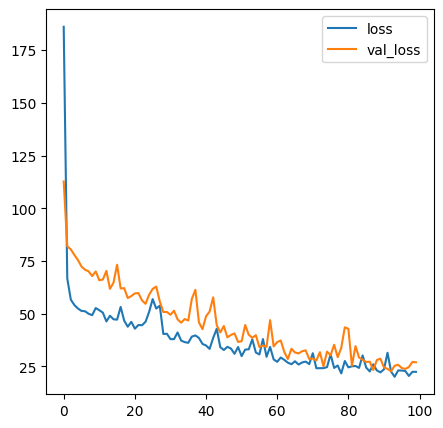

In [16]:
plt.figure(figsize=(5,5))

plt.plot(result.history["loss"], label="loss")
plt.plot(result.history["val_loss"], label="val_loss")

plt.legend()
plt.show()

In [17]:
model.evaluate(x_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.1330 


26.231918334960938

In [18]:
predict = model.predict(x_test)
y_test["predict"] = predict

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [19]:
y_test

,PRICE,predict
307,28.2,33.710167
343,23.9,25.834703
47,16.6,17.162109
67,22.0,27.123756
362,20.8,20.988472
...,...,...
467,19.1,11.684831
95,28.4,23.791265
122,20.5,20.292477
260,33.8,29.020590
